In [1]:
import traffic_light_detector
from PIL import Image
import numpy as np

ImportError: No module named 'object_detection'

In [2]:
# Train the model using the test.record dataset with labels
import importlib
importlib.reload(traffic_light_detector)

#tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_coco_2018_01_28', 'mscoco_label_map')
#tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_bosch', 'bosch_label_map')
#tl = traffic_light_detector.TLDetector('ssd_mobilenet_v2_bosch', 'bosch_label_map')

tl = traffic_light_detector.TLDetector('faster_rcnn_inception_v2_udacity_real', 'udacity_label_map')

In [3]:
# Import image data files
import glob
import random

image_fnames = glob.glob("../../../data/udacity/*.jpg")
#image_fnames = glob.glob("../../../data/bosch/rgb/test/*")
#random.shuffle(image_fnames)
#image_fnames = image_fnames[:5]

print(image_fnames)

['../../../data/udacity/left0000.jpg', '../../../data/udacity/left0140.jpg', '../../../data/udacity/left0183.jpg']


In [5]:
# Perform classification of each image
import cv2

detections = []

for image_path in image_fnames:
    #image = Image.open(image_path)
    #print("Channel type: " + image.mode)
    #print("Image type: %s"  % type(image))
    #image_np = traffic_light_detector.load_image_into_numpy_array(image)
    
    # Read image with cv2 and convert to rgb (as an example)
    image_np = cv2.imread(image_path)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
    
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    print("Running inference on %s" % image_path)
    output_dict = tl.run_inference_for_single_image(image_np)
    detections.append({"ImagePath": image_path, "Image_NP": image_np, "output_dict": output_dict})

Channel type: RGB
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Running inference on ../../../data/udacity/left0000.jpg
Channel type: RGB
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Running inference on ../../../data/udacity/left0140.jpg
Channel type: RGB
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Running inference on ../../../data/udacity/left0183.jpg


../../tensorflow/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/root/miniconda3/envs/carla-kitt/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/miniconda3/envs/carla-kitt/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/miniconda3/envs/carla-kitt/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/miniconda3/envs/carla-kitt/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/miniconda3/envs/carla-kitt/lib/python3.5/site-pack

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}
{'detection_boxes': array([[0.38131416, 0.47288528, 0.4305971 , 0.4864941 ],
       [0.38465545, 0.47062415, 0.43985942, 0.4864325 ],
       [0.3866822 , 0.46782756, 0.43577674, 0.48618668],
       ...,
       [0.407644  , 0.01126574, 0.5471654 , 0.02601453],
       [0.9461428 , 0.7661119 , 1.        , 0.79624325],
       [0.8074431 , 0.00723858, 0.95888114, 0.02476598]], dtype=float32), 'detection_classes': array([1, 3, 2, 1, 4, 4, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 4, 3, 4, 1, 3, 1,
       4, 4, 1, 1, 4, 3, 2, 1, 4, 1, 2, 2, 4, 4, 3, 3, 1, 4, 2, 4, 2, 1,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 3,
       1, 4, 1, 4, 4, 2, 1, 

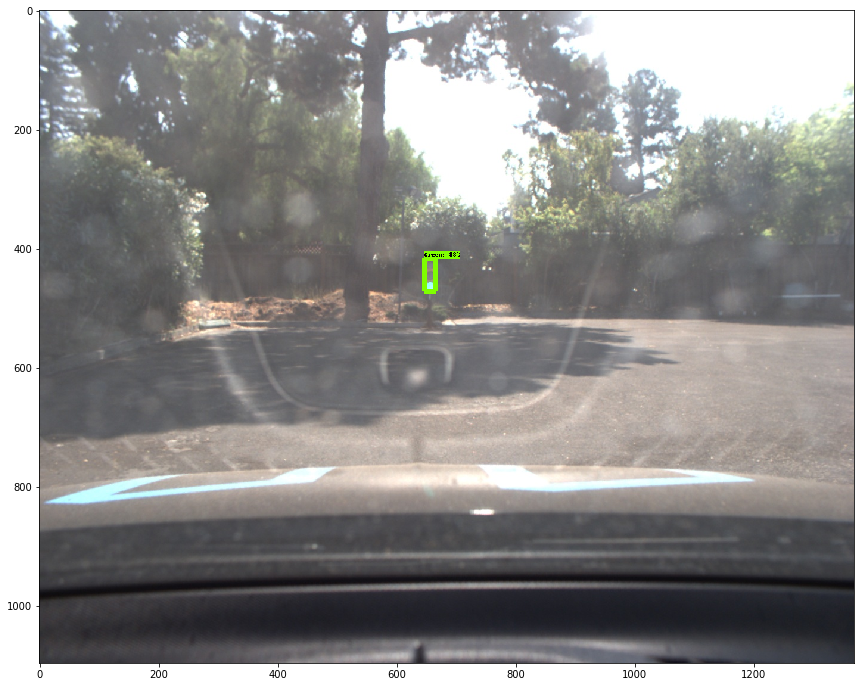

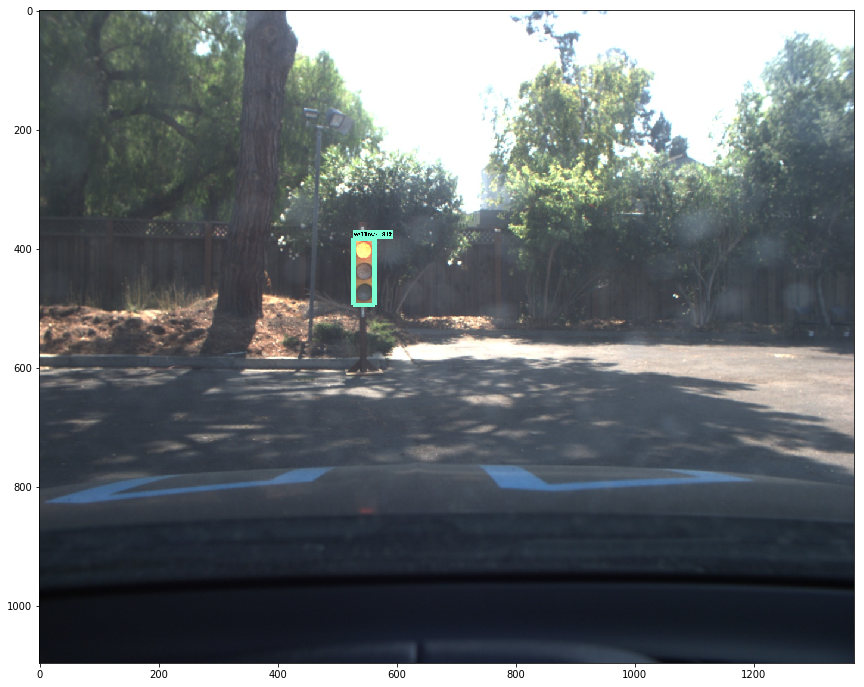

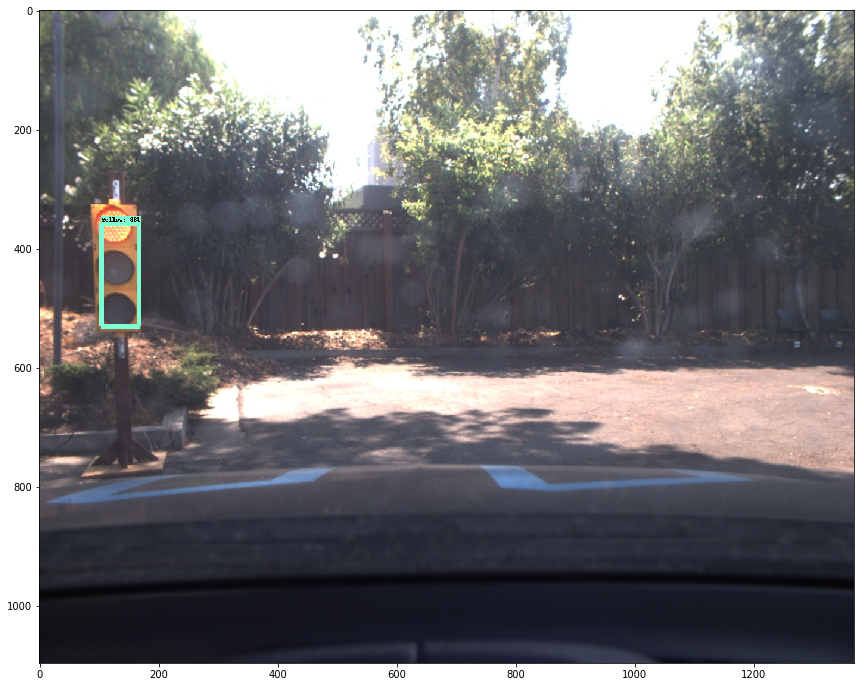

In [6]:
# Visualize
%matplotlib inline
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from matplotlib import pyplot as plt

MAX_NUM_CLASSES=90 #arbitrary number, not that important

label_map = label_map_util.load_labelmap(tl.labels_path)
categories = label_map_util.convert_label_map_to_categories(label_map, MAX_NUM_CLASSES)
category_index = label_map_util.create_category_index(categories)
print(category_index)
IMAGE_SIZE = (18, 12)

for detection in detections:
    image_np = detection["Image_NP"]
    output_dict = detection["output_dict"]
    
    vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks'),
          use_normalized_coordinates=True,
          line_thickness=8,
          min_score_thresh=0.5)
    print(output_dict)
    
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

In [ ]:
# Save model